In [6]:
pip install cbsodata


In [7]:
import cbsodata

In [ ]:
import pandas as pd

In [8]:
df = pd.DataFrame(cbsodata.get_data('84707ENG'))
df

,ID,Population,Sex,PersonalCharacteristics,Margins,Periods,TrafficParticipation_1,UseOfPublicTransport_2
0,0,Population 6 years or older,Total male and female,Total persons,Value,2018,82.9,8.6
1,1,Population 6 years or older,Total male and female,Total persons,Value,2019,81.9,8.6
2,2,Population 6 years or older,Total male and female,Total persons,Value,2020,73.8,3.9
3,3,Population 6 years or older,Total male and female,Total persons,Value,2021,78.1,4.2
4,4,Population 6 years or older,Total male and female,Total persons,Value,2022,79.7,6.1
...,...,...,...,...,...,...,...,...
4195,4195,Population: 12 years or older,Sex unknown,No driver's license; under 17,Upper bound 95% confidence interval,2018,NaN,NaN
4196,4196,Population: 12 years or older,Sex unknown,No driver's license; under 17,Upper bound 95% confidence interval,2019,NaN,NaN
4197,4197,Population: 12 years or older,Sex unknown,No driver's license; under 17,Upper bound 95% confidence interval,2020,NaN,NaN
4198,4198,Population: 12 years or older,Sex unknown,No driver's license; under 17,Upper bound 95% confidence interval,2021,NaN,NaN


In [27]:
df_value = df[( df['Population'] == 'Population 6 years or older') & (df['Margins'] == 'Value') & (df['Sex'] != 'Sex unknown')];
df_sorted = df_value.drop(columns=['Margins', 'Population', 'ID']);
df_sorted

,Sex,PersonalCharacteristics,Periods,TrafficParticipation_1,UseOfPublicTransport_2
0,Total male and female,Total persons,2018,82.9,8.6
1,Total male and female,Total persons,2019,81.9,8.6
2,Total male and female,Total persons,2020,73.8,3.9
3,Total male and female,Total persons,2021,78.1,4.2
4,Total male and female,Total persons,2022,79.7,6.1
...,...,...,...,...,...
1560,Female,No driver's license; under 17,2018,88.3,5.6
1561,Female,No driver's license; under 17,2019,87.5,5.6
1562,Female,No driver's license; under 17,2020,77.8,2.9
1563,Female,No driver's license; under 17,2021,83.4,3.5


In [28]:
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.io as pio

In [30]:
mask = df_sorted['PersonalCharacteristics'].str.startswith('Age')
df_age = df_sorted[mask]
df_age

#df_age = df_sorted[ df_sorted['PersonalCharacteristics'] == 

,Sex,PersonalCharacteristics,Periods,TrafficParticipation_1,UseOfPublicTransport_2
15,Total male and female,Age: 6 to 11 years,2018,90.6,2.1
16,Total male and female,Age: 6 to 11 years,2019,88.9,1.6
17,Total male and female,Age: 6 to 11 years,2020,80.0,NaN
18,Total male and female,Age: 6 to 11 years,2021,85.6,NaN
19,Total male and female,Age: 6 to 11 years,2022,85.2,1.6
...,...,...,...,...,...
1170,Female,Age: 75 years or older,2018,57.3,3.2
1171,Female,Age: 75 years or older,2019,56.0,2.8
1172,Female,Age: 75 years or older,2020,47.7,NaN
1173,Female,Age: 75 years or older,2021,55.9,1.5


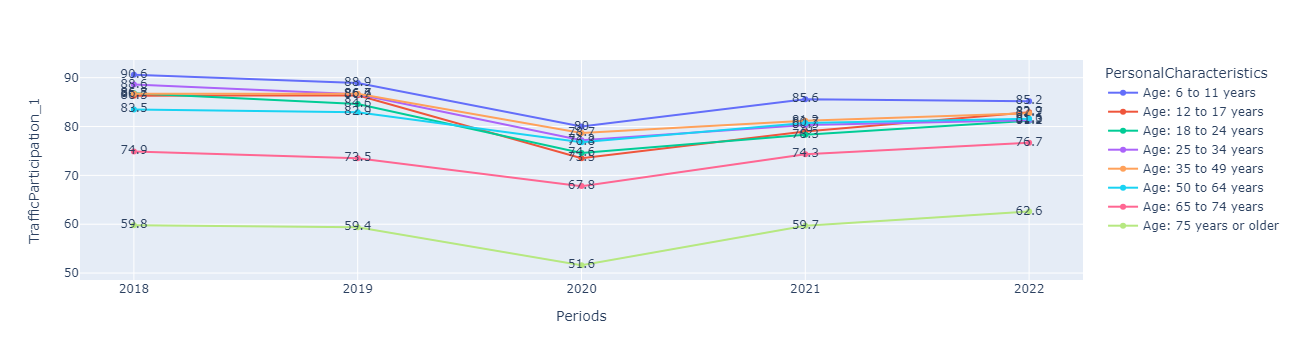

In [35]:
fig = px.line(df_age[ df_age['Sex'] == 'Total male and female'], y='TrafficParticipation_1', x='Periods', color='PersonalCharacteristics', text='TrafficParticipation_1')
fig.show()

In [ ]:
fig = px.line(df_age[ df_age['Sex'] == 'Total male and female'], y='TrafficParticipation_1', x='Periods', color='PersonalCharacteristics', text='TrafficParticipation_1')
fig.show()

In [ ]:
import time
import timeit
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
import datetime
import warnings
from scipy.interpolate import interp1d

In [ ]:
start = timeit.default_timer()

result = seasonal_decompose(df_T2_V, model='additive')
print(result.trend)
print(result.seasonal)
print(result.resid)
print(result.observed)

result.plot()
plt.show()

stop = timeit.default_timer()
print('Time: ', stop - start)

# ZOOI

In [ ]:
aggregated_df = df.groupby(['Periods', 'Population', 'Sex', 'PersonalCharacteristics']).mean().reset_index()

pivot_df = aggregated_df.pivot(index='Periods', columns=['Population', 'Sex', 'PersonalCharacteristics'], values=['TrafficParticipation_1', 'UseOfPublicTransport_2'])

# Flatten the MultiIndex columns
pivot_df.columns = ['_'.join(map(str, col)) for col in pivot_df.columns]

# Reset the index
pivot_df.reset_index(inplace=True)

pivot_df

,Periods,TrafficParticipation_1_Population 6 years or older_Female_Age: 12 to 17 years,TrafficParticipation_1_Population 6 years or older_Female_Age: 18 to 24 years,TrafficParticipation_1_Population 6 years or older_Female_Age: 25 to 34 years,TrafficParticipation_1_Population 6 years or older_Female_Age: 35 to 49 years,TrafficParticipation_1_Population 6 years or older_Female_Age: 50 to 64 years,TrafficParticipation_1_Population 6 years or older_Female_Age: 6 to 11 years,TrafficParticipation_1_Population 6 years or older_Female_Age: 65 to 74 years,TrafficParticipation_1_Population 6 years or older_Female_Age: 75 years or older,TrafficParticipation_1_Population 6 years or older_Female_Background: Dutch,...,UseOfPublicTransport_2_Population: 12 years or older_Total male and female_Participatie:student/scholier,UseOfPublicTransport_2_Population: 12 years or older_Total male and female_Participation: retired,UseOfPublicTransport_2_Population: 12 years or older_Total male and female_Participation: unemployed,"UseOfPublicTransport_2_Population: 12 years or older_Total male and female_Participation: unemployed, other",UseOfPublicTransport_2_Population: 12 years or older_Total male and female_Participation: working 12 -29 h. a week,UseOfPublicTransport_2_Population: 12 years or older_Total male and female_Participation: working >30 hours a week,UseOfPublicTransport_2_Population: 12 years or older_Total male and female_Persons without student publ.transp.card,UseOfPublicTransport_2_Population: 12 years or older_Total male and female_Students with week pass publ. transp.,UseOfPublicTransport_2_Population: 12 years or older_Total male and female_Students with weekend pass publ. transp.,UseOfPublicTransport_2_Population: 12 years or older_Total male and female_Total persons
0,2018,86.866667,87.866667,89.633333,86.800000,84.000000,90.066667,75.333333,57.266667,84.600000,...,20.100000,3.866667,6.733333,5.400000,7.833333,9.600000,7.500000,40.766667,17.566667,9.100000
1,2019,86.333333,85.733333,86.433333,86.366667,83.200000,88.166667,72.400000,55.966667,82.900000,...,19.033333,3.733333,6.800000,5.000000,8.400000,9.933333,7.500000,41.133333,19.800000,9.100000
2,2020,74.933333,75.833333,77.866667,78.466667,76.833333,80.133333,65.966667,47.700000,76.700000,...,9.833333,1.433333,NaN,2.100000,3.900000,4.300000,3.400000,18.633333,NaN,4.133333
3,2021,80.266667,81.000000,81.566667,82.400000,81.100000,86.500000,73.500000,55.866667,81.000000,...,11.700000,1.533333,5.166667,2.966667,4.666667,3.966667,3.433333,23.733333,16.400000,4.500000
4,2022,83.200000,82.833333,82.566667,83.500000,81.766667,85.266667,75.700000,59.100000,82.366667,...,15.566667,2.033333,6.400000,3.833333,6.400000,6.266667,5.100000,30.233333,19.566667,6.400000


In [ ]:
df_formatted = df_sorted.set_index(['Population'

In [24]:
df_sorted['Population'].value_counts()

Population 6 years or older      525
Population: 12 years or older    525
Name: Population, dtype: int64